In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Constants:
all_data_desktop = r'C:\Data Sciences\data\all_data'
in_desktop = r'C:\Data Sciences\data\in'
out_desktop = r'C:\Data Sciences\data\out'

In [70]:
df = pd.read_excel(r'C:\Data Sciences\data\in\spend_data.xlsx').fillna("Other")
df.drop(['Income/Expense','Note2','Amount','Currency','Account3'], axis=1, inplace=True)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         24 non-null     datetime64[ns]
 1   Account      24 non-null     object        
 2   Category     24 non-null     object        
 3   Subcategory  24 non-null     object        
 4   Note         24 non-null     object        
 5   USD          24 non-null     float64       
 6   Year         24 non-null     int64         
 7   Month        24 non-null     int64         
 8   Day          24 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 1.8+ KB


In [72]:
df.head()

,Date,Account,Category,Subcategory,Note,USD,Year,Month,Day
0,2022-02-12 19:47:02.059,AMEX,Apparel,Shoes,Dicks,131.15,2022,2,12
1,2022-02-02 19:50:24.899,AMEX,Apparel,Clothing,Other,106.00,2022,2,2
2,2022-02-01 14:28:25.707,AMEX,Beauty,Cosmetics,Scotch and Scissors,56.00,2022,2,1
3,2022-02-12 15:58:52.791,CapitalOne,Entertainment,Other,Urban Air,40.00,2022,2,12
4,2022-02-04 19:27:55.499,AMEX,Entertainment,Other,Frontier Justice,88.77,2022,2,4


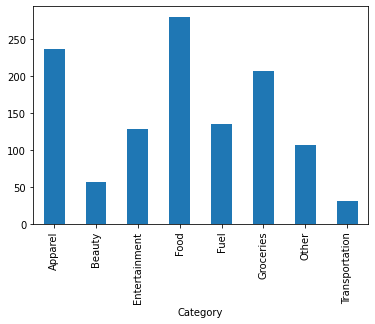

In [73]:
#plot the bar graph of marital status with average value of response_rate
df.groupby('Category')['USD'].sum().plot.bar()
plt.show()

In [106]:
piv_1 = np.round(pd.pivot_table(df, values='USD', 
                                index=['Category'], 
                                columns=['Month'], 
                                aggfunc=[np.sum],
                                fill_value=0,
                                margins=True, 
                                margins_name='Total'),2)

piv_1

sum         
Month                 2    Total
Category                        
Apparel          237.15   237.15
Beauty            56.00    56.00
Entertainment    128.77   128.77
Food             280.24   280.24
Fuel             135.67   135.67
Groceries        206.80   206.80
Other            106.87   106.87
Transportation    31.00    31.00
Total           1182.50  1182.50

In [107]:
piv_2 = np.round(pd.pivot_table(df, values='USD', 
                                index=['Subcategory'], 
                                columns=['Category'], 
                                aggfunc=[np.sum],
                                fill_value=0,
                                margins=True, 
                                margins_name='Total'),2)

piv_2

sum                                                         \
Category    Apparel Beauty Entertainment    Food    Fuel Groceries   Other   
Subcategory                                                                  
Beverages      0.00      0          0.00   75.21    0.00       0.0    0.00   
Car            0.00      0          0.00    0.00    0.00       0.0    0.00   
Clothing     106.00      0          0.00    0.00    0.00       0.0    0.00   
Cosmetics      0.00     56          0.00    0.00    0.00       0.0    0.00   
Dinner         0.00      0          0.00   19.48    0.00       0.0    0.00   
Eating out     0.00      0          0.00  166.36    0.00       0.0    0.00   
Other          0.00      0        128.77    0.00  135.67     206.8   33.25   
Sammie         0.00      0          0.00    0.00    0.00       0.0   73.62   
Shoes        131.15      0          0.00    0.00    0.00       0.0    0.00   
Snacks         0.00      0          0.00   19.19    0.00       0.0    0.00   
Total        237.15     56        128.77  280.24  135.67     206.8  106.87   

                                     
Category    Transportation    Total  
Subcategory                          
Beverages                0    75.21  
Car                     31    31.00  
Clothing                 0   106.00  
Cosmetics                0    56.00  
Dinner                   0    19.48  
Eating out               0   166.36  
Other                    0   504.49  
Sammie                   0    73.62  
Shoes                    0   131.15  
Snacks                   0    19.19  
Total                   31  1182.50

In [125]:
piv_3 = np.round(pd.pivot_table(df, values='USD', 
                                index=['Category','Subcategory'], 
                                columns=['Month'], 
                                aggfunc=[np.sum],
                                fill_value=0,
                                margins=True, 
                                margins_name='Total'),0)

df_piv_3 = pd.DataFrame(piv_3)
df_piv_3.to_excel(out_desktop + '\piv_3.xlsx')
df_piv_3

sum        
Month                            2   Total
Category       Subcategory                
Apparel        Clothing      106.0   106.0
               Shoes         131.0   131.0
Beauty         Cosmetics      56.0    56.0
Entertainment  Other         129.0   129.0
Food           Beverages      75.0    75.0
               Dinner         19.0    19.0
               Eating out    166.0   166.0
               Snacks         19.0    19.0
Fuel           Other         136.0   136.0
Groceries      Other         207.0   207.0
Other          Other          33.0    33.0
               Sammie         74.0    74.0
Transportation Car            31.0    31.0
Total                       1182.0  1182.0

In [126]:
piv_4 = np.round(pd.pivot_table(df, values='USD', 
                                index=['Subcategory','Note'], 
                                columns=['Category'], 
                                aggfunc=[np.sum],
                                fill_value=0,
                                margins=True, 
                                margins_name='Total'),2)

piv_4

sum                                       \
Category                         Apparel Beauty Entertainment    Food    Fuel   
Subcategory Note                                                                
Beverages   Buddy's                 0.00      0          0.00   12.91    0.00   
            Callahan                0.00      0          0.00   53.68    0.00   
            Starbucks               0.00      0          0.00    8.62    0.00   
Car         Carwash                 0.00      0          0.00    0.00    0.00   
            Casey's                 0.00      0          0.00    0.00    0.00   
Clothing    Other                 106.00      0          0.00    0.00    0.00   
Cosmetics   Scotch and Scissors     0.00     56          0.00    0.00    0.00   
Dinner      McDonald's              0.00      0          0.00   19.48    0.00   
Eating out  Culvers                 0.00      0          0.00   17.29    0.00   
            First Watch             0.00      0          0.00   57.12    0.00   
            Louisburg BBQ           0.00      0          0.00   60.17    0.00   
            McDonald's              0.00      0          0.00   31.78    0.00   
Other       Casey's                 0.00      0          0.00    0.00  135.67   
            Frontier Justice        0.00      0         88.77    0.00    0.00   
            Google Services         0.00      0          0.00    0.00    0.00   
            Menards                 0.00      0          0.00    0.00    0.00   
            Price chopper           0.00      0          0.00    0.00    0.00   
            Urban Air               0.00      0         40.00    0.00    0.00   
Sammie      Petsmart                0.00      0          0.00    0.00    0.00   
Shoes       Dicks                 131.15      0          0.00    0.00    0.00   
Snacks      Casey's                 0.00      0          0.00   19.19    0.00   
Total                             237.15     56        128.77  280.24  135.67   

                                                                            
Category                         Groceries   Other Transportation    Total  
Subcategory Note                                                            
Beverages   Buddy's                    0.0    0.00              0    12.91  
            Callahan                   0.0    0.00              0    53.68  
            Starbucks                  0.0    0.00              0     8.62  
Car         Carwash                    0.0    0.00             15    15.00  
            Casey's                    0.0    0.00             16    16.00  
Clothing    Other                      0.0    0.00              0   106.00  
Cosmetics   Scotch and Scissors        0.0    0.00              0    56.00  
Dinner      McDonald's                 0.0    0.00              0    19.48  
Eating out  Culvers                    0.0    0.00              0    17.29  
            First Watch                0.0    0.00              0    57.12  
            Louisburg BBQ              0.0    0.00              0    60.17  
            McDonald's                 0.0    0.00              0    31.78  
Other       Casey's                    0.0    0.00              0   135.67  
            Frontier Justice           0.0    0.00              0    88.77  
            Google Services            0.0   17.99              0    17.99  
            Menards                    0.0   15.26              0    15.26  
            Price chopper            206.8    0.00              0   206.80  
            Urban Air                  0.0    0.00              0    40.00  
Sammie      Petsmart                   0.0   73.62              0    73.62  
Shoes       Dicks                      0.0    0.00              0   131.15  
Snacks      Casey's                    0.0    0.00              0    19.19  
Total                                206.8  106.87             31  1182.50